# Recreation of "Deformation of a ring"
We will recreate the "deformation of a ring" example in Chizat et al. (2018).

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.dynamicUOT import computeGeodesic
from proximal.grids import speed_and_growth
import ipywidgets as widgets
from ipywidgets import interact

# Set Up

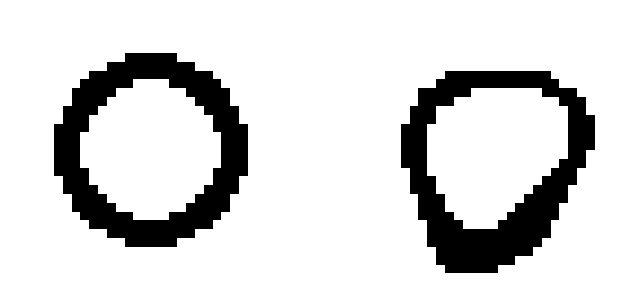

sum(ρ_0) = 188.0,
sum(ρ_1) = 191.0


In [2]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# Create a ring
N = 32
σ = N / 100
x = np.linspace(-1., 1., N)
y = np.linspace(-1., 1., N)
xx, yy = np.meshgrid(x, y)
ff = lambda x, y: 1.0 * ((1/4 < x**2 + y**2) & (x**2 + y**2 < 1/2))
ρ_0 = ff(xx, yy).astype(np.float64)

# Smooth deformation field
ker = np.exp(-x**2 / σ**2) / np.sqrt(2 * np.pi * σ**2) / 10
ker = ker[:, np.newaxis] * ker[np.newaxis, :]
indN = N // 2

def smooth_field(field):
    field = convolve(field, ker, mode='reflect')
    field = convolve(field, ker, mode='reflect')
    return field

v1 = smooth_field(np.random.randn(N, N))
v2 = smooth_field(np.random.randn(N, N))

def push(x, y):
    xi = min(max(int(np.floor(x * N / 2 + N / 2)), 0), N-1)
    yi = min(max(int(np.floor(y * N / 2 + N / 2)), 0), N-1)
    return (x + v1[xi, yi], y + v2[xi, yi])

x_push = np.linspace(-.99, .99, N)
y_push = np.linspace(-.99, .99, N)
xx_push, yy_push = np.meshgrid(x_push, y_push)
ρ_1 = np.array([ff(*push(x, y)) for x, y in zip(np.ravel(xx_push), np.ravel(yy_push))]).reshape(N, N)

# Plot
plt.figure(figsize=[8, 4])
plt.subplot(121)
plt.imshow(ρ_0, cmap="Greys")
plt.axis("off")
plt.subplot(122)
plt.imshow(ρ_1, cmap="Greys")
plt.axis("off")
plt.show()

sum_ρ_0 = np.sum(ρ_0)
sum_ρ_1 = np.sum(ρ_1)

print(f"sum(ρ_0) = {sum_ρ_0},\nsum(ρ_1) = {sum_ρ_1}")

# Calculation of a geodesic

In [3]:
T = 20
ll=(1.0, 1.0, 1.0)
x, lists = computeGeodesic(ρ_0, ρ_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, niter=1500)

Computing a geodesic for optimal transport with source...
Progress: 99%
Done.


# Plotting the geodesic

In [4]:
import ipywidgets as widgets
from ipywidgets import interact
v, g = speed_and_growth(x.V)

X = np.linspace(0, 1, x.cs[1])
Y = np.linspace(0, 1, x.cs[2])

def plot_ring(t, x, g, X, Y):
    f, axes = plt.subplots(1, 3, figsize=[10, 2.5])

    ax1, ax2, ax3 = axes

    # Density plot
    ax1.pcolormesh(X, Y, x.V.D[0][t, :, :], cmap="gray_r")
    ax1.axis("off")
    ax1.set_title(r"Density $\rho_t$")

    # Growth plot
    ax2.pcolormesh(X, Y, g[t, :, :], cmap="bwr", vmin=-2, vmax=2)
    ax2.axis("off")
    ax2.set_title("Growth")

    # Velocity plot
    ax3.quiver(X, Y, x.V.D[2][t, :, :], x.V.D[1][t, :, :], x.V.D[0][t, :, :], cmap="gray_r")
    ax3.axis("off")
    ax3.set_title("Velocity")

    plt.show()

# Interactive widget
plot_elements4 = [x.copy(), g.copy(), X.copy(), Y.copy()]
interact(lambda t: plot_ring(t, *plot_elements4), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>